# 📊 Stock Market Sentiment Analyzer

**Goal:** Use NLP to analyze stock market sentiment from News and Twitter and compare it with stock price trends. 

## **Project Overview**
This project aims to analyze sentiment in stock market-related tweets using Natural Language Processing (NLP). By leveraging **Hugging Face's FinBERT model**, we classify tweets as **positive, negative, or neutral** and explore how sentiment correlates with stock market trends. 

In [8]:
# Important Necessary Libraries
from IPython.display import display
import pandas as pd
import random
import yfinance as yf 
import requests 
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Load Dataset

In [2]:
from datasets import load_dataset

# Load datasets 
dataset = load_dataset ("StephanAkkerman/stock-market-tweets-data")

# Get the number of tweets in the dataset
num_tweets = len(dataset['train'])
num_tweets

923673

In [3]:
print(dataset['train'][:5])

{'id': [1, 2, 3, 4, 5], 'created_at': ['2020-04-09 23:59:51+00:00', '2020-04-09 23:58:55+00:00', '2020-04-09 23:58:52+00:00', '2020-04-09 23:58:27+00:00', '2020-04-09 23:57:59+00:00'], 'text': ["@KennyDegu very very little volume. With $10T you'd think they could have $SPX  trading at 10,000 by now.", '#ES_F achieved Target 2780 closing above 50% #Fibonacci  level, momentum still up. possible push towards 2842-2886 next week. $SPX $SPY  #tradign #futures https://t.co/wD2A0102nC', 'RT @KimbleCharting: Silver/Gold indicator creates one of the largest bullish reversal patterns in decades while testing multi-decade suppor…', '@Issaquahfunds Hedged our $MSFT position into close. Seemed to be getting lazy over this past week.', "RT @zipillinois: 3 Surprisingly Controversial Stocks in Donald Trump's Portfolio @themotleyfool #stocks $GILD $MO https://t.co/d9hlJnSRN3"]}


In [4]:
# Hugging Face Transformers for Sentiment Analysis
from transformers import pipeline

# Load FinBERT model
sentiment_pipeline = pipeline("text-classification", model="ProsusAI/finbert")

Device set to use mps:0


In [5]:
sample_size = 5000
sampled_tweets = random.sample(list(dataset['train']), sample_size)

df_tweets = pd.DataFrame(sampled_tweets)

# Display first few raws
print(df_tweets.head())

       id                 created_at  \
0  593725  2020-06-20 16:31:32+00:00   
1  631451  2020-06-23 08:13:45+00:00   
2  289208  2020-05-05 01:15:12+00:00   
3  908741  2020-07-15 21:16:10+00:00   
4  436965  2020-06-06 12:55:58+00:00   

                                                text  
0  RT @SeekingAlpha: MacroView: Retail Sales Boun...  
1  $FB - Facebook: Short-Term Pain, But Long-Term...  
2  RT @WallStSai: NEW ZEALAND RECORDS NO NEW CASE...  
3  RT @Street_Insider: Amazon CEO Jeff Bezos' Twi...  
4  RT @ISABELNET_SA: 📌Markets\n\nAccording to Bof...  


In [6]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text) # Remove URL
    text = re.sub(r'@\w+', '', text)    # Remove mentions @user 
    text = re.sub(r'#\w+','', text)     # Remove hashtags
    text = re.sub(r'#[A-Za-z0-9] +', ' ', text) # Remove special characters 
    text = re.sub(r'[^\w\s$]','', text) # Keep words, numbers, and "$" (for stocks)
    return text.strip()

# Apply cleaning to sampled tweets 
df_tweets['cleaned_text'] = df_tweets['text'].apply(clean_text)

df_tweets['sentiment'] = df_tweets['cleaned_text'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

In [ ]:
display(df_tweets)

,id,created_at,text,cleaned_text,sentiment
0,593725,2020-06-20 16:31:32+00:00,RT @SeekingAlpha: MacroView: Retail Sales Boun...,RT MacroView Retail Sales Bounce But Consumer...,positive
1,631451,2020-06-23 08:13:45+00:00,"$FB - Facebook: Short-Term Pain, But Long-Term...",$FB Facebook ShortTerm Pain But LongTerm This...,positive
2,289208,2020-05-05 01:15:12+00:00,RT @WallStSai: NEW ZEALAND RECORDS NO NEW CASE...,RT NEW ZEALAND RECORDS NO NEW CASES OF COVID1...,negative
3,908741,2020-07-15 21:16:10+00:00,RT @Street_Insider: Amazon CEO Jeff Bezos' Twi...,RT Amazon CEO Jeff Bezos Twitter account also...,negative
4,436965,2020-06-06 12:55:58+00:00,RT @ISABELNET_SA: 📌Markets\n\nAccording to Bof...,RT Markets\n\nAccording to BofA the biggest s...,negative
...,...,...,...,...,...
4995,374403,2020-06-01 16:13:45+00:00,If I could pass on 1 'tip' after a crisis: buy...,If I could pass on 1 tip after a crisis buy an...,neutral
4996,71617,2020-04-15 13:24:32+00:00,RT @RedDogT3: $spx levels and thoughts both on...,RT $spx levels and thoughts both on an interm...,positive
4997,676000,2020-06-26 12:27:06+00:00,RT @Tickeron: $UNH in Uptrend: price may ascen...,RT $UNH in Uptrend price may ascend as a resu...,negative
4998,366512,2020-05-31 18:30:17+00:00,Join our #FREE live #webinar w #AmvestCapital ...,Join our live w \n June 4 405pm EST \n $...,neutral


## Apply Cleaning & Compare Before/After

In [64]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text) # Remove URL
    text = re.sub(r'@\w+', '', text)    # Remove mentions @user 
    text = re.sub(r'#\w+','', text)     # Remove hashtags
    text = re.sub(r'#[A-Za-z0-9] +', ' ', text) # Remove special characters 
    text = re.sub(r'[^\w\s$]','', text) # Keep words, numbers, and "$" (for stocks)
    return text.strip()

cleaned_sentiments = []
for i in range(50000):4
    cleaned_text = clean_text(dataset['train'][i]['text'])
    cleaned_result = sentiment_pipeline(cleaned_text)
    cleaned_sentiments.append(cleaned_result[0]['label'])

KeyboardInterrupt: 

In [ ]:
batch_size = 1000 
for i in range (0, 30000, batch_size):
    batch_texts = [clean_text(dataset['train'][j]['text']) for j in range(i, min(i+ batch_size, 30000))]
    batch_results = sentiment_pipeline(batch_texts)
    cleaned_sentiments.extend([res['label'] for res in batch_results])



In [ ]:
original_sentiments = []

for i in range(50000): 
    text = dataset['train'][i]['text']
    original_result = sentiment_pipeline(text)
    original_sentiments.append(original_result[0]['label'])

    # Create DataFrames for comparison 
df_comparison = pd.DataFrame({'Original': original_sentiments, 'Cleaned': cleaned_sentiments})

/var/folders/z7/jj2xy8g53jnd942hm_zfr1340000gn/T/ipykernel_53774/1696791064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_comparison, x='Change', palette = 'coolwarm')


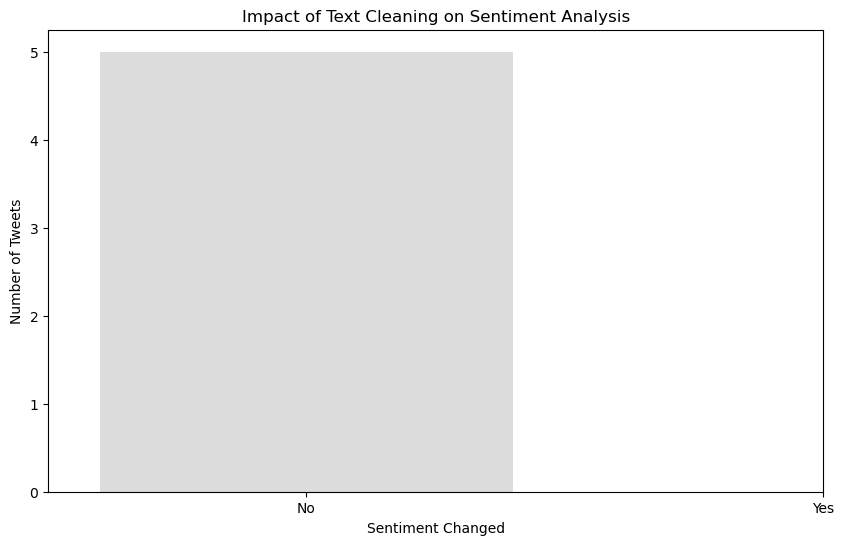

In [ ]:
# Count how many tweets changes sentiment 
df_comparison['Change'] = df_comparison['Original'] != df_comparison['Cleaned']

plt.figure(figsize=(10, 6))
sns.countplot(data=df_comparison, x='Change', palette = 'coolwarm')
plt.title('Impact of Text Cleaning on Sentiment Analysis')
plt.xlabel('Sentiment Changed')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

In [ ]:
text = dataset['train'][0]['text']
result = sentiment_pipeline(text)
print(result)

[{'label': 'neutral', 'score': 0.536605179309845}]


**Expected Insights:**
- If **positive tweets dominates**, it may indicate **bullis**h** market sentiment. 
- If **positive tweets dominates**, it may suggest a **bearish** trend. 
- A **neutral balance** indicates mixed sentiment, suggesting uncertainty. 

/var/folders/z7/jj2xy8g53jnd942hm_zfr1340000gn/T/ipykernel_53774/1004951083.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sentiment_df, x='Sentiment', palette='coolwarm')


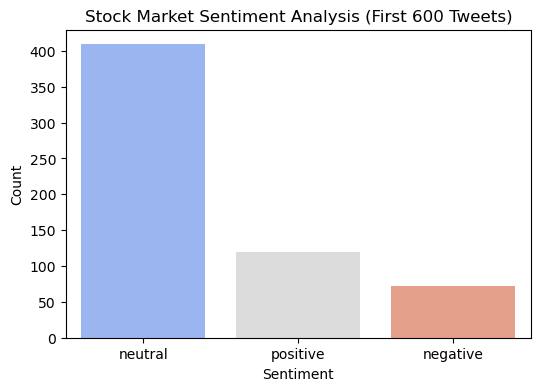

In [ ]:
# Collect sentiment results for 100 tweets 
sentiments = []
for i in range(50000): 
    text = clean_text(dataset['train'][i]['text'])
    result = sentiment_pipeline(text)
    sentiments.append(result[0]['label'])

# Convert to DataFrame 
sentiment_df = pd.DataFrame(sentiments, columns=['Sentiment'])

plt.figure(figsize=(6,4))
sns.countplot(data=sentiment_df, x='Sentiment', palette='coolwarm')
plt.title("Stock Market Sentiment Analysis (First 600 Tweets)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [ ]:
for i in range(54):  # Check first 5 tweets
    original_text = dataset['train'][i]['text']
    cleaned_text = clean_text(original_text)

    print(f"Original: {original_text}")
    print(f"Cleaned: {cleaned_text}\n")


Original: @KennyDegu very very little volume. With $10T you'd think they could have $SPX  trading at 10,000 by now.
Cleaned: very very little volume With $10T youd think they could have $SPX  trading at 10000 by now

Original: #ES_F achieved Target 2780 closing above 50% #Fibonacci  level, momentum still up. possible push towards 2842-2886 next week. $SPX $SPY  #tradign #futures https://t.co/wD2A0102nC
Cleaned: achieved Target 2780 closing above 50   level momentum still up possible push towards 28422886 next week $SPX $SPY

Original: RT @KimbleCharting: Silver/Gold indicator creates one of the largest bullish reversal patterns in decades while testing multi-decade suppor…
Cleaned: RT  SilverGold indicator creates one of the largest bullish reversal patterns in decades while testing multidecade suppor

Original: @Issaquahfunds Hedged our $MSFT position into close. Seemed to be getting lazy over this past week.
Cleaned: Hedged our $MSFT position into close Seemed to be getting lazy over

In [ ]:
df_comparison['Changed'] = df_comparison['Original'] != df_comparison['Cleaned']

In [ ]:
print(df_comparison.head(10))  # Check first 10 tweets

   Original   Cleaned  Change  Changed
0   neutral   neutral   False    False
1  positive  positive   False    False
2  positive  positive   False    False
3  negative  negative   False    False
4   neutral   neutral   False    False


### Text Cleaning & Sentiment Stability 
After Processing, I found that text cleaning did not significantly alter sentiment scores. This suggest that FinBERT is resistant to minor noise like mentions, hashtags, and URLs, making it a reliable model for finantial sentiment analysis. 

## Conclusion 
This project demonstrates how **NLP can be used to analyze stock market sentiment**. By leveraging **Hugging Face's FinBERT**, I:
- Successfully **classified finantial tweets**, into positive, negative, and neutral. 
- Visualized **how senttiment is distributed**.
- Laid the groundwork for future applications, such as **correlating sentiment with actual stock prices**.